##### This notebook calculates the difference between the linear theories and the depth-dependent theory
###### First, import packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

###### Make plots!

In [6]:
import matplotlib
# To save this stuff as SVG
matplotlib.rcParams['axes.unicode_minus']=False
matplotlib.use("svg")
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
matplotlib.rcParams.update(new_rc_params)

font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 8}
import matplotlib
matplotlib.rc('font', **font)

Critical value:  Lyakin 











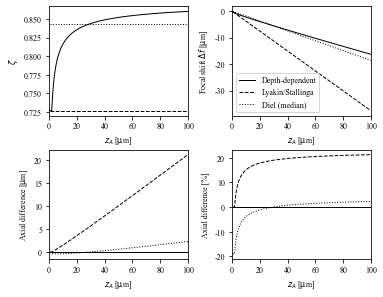

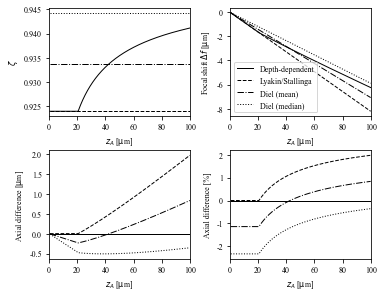

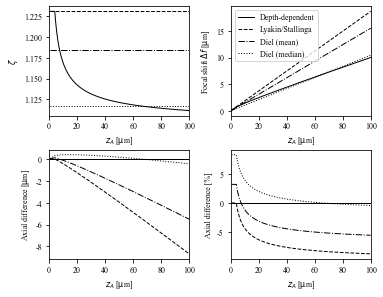

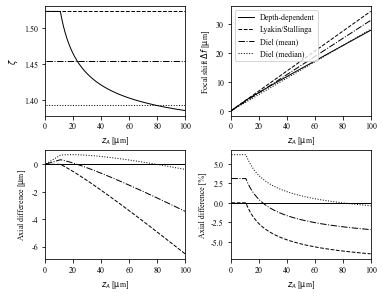

In [8]:
do_save = True

crit_value = 'Lyakin' # 'Lyakin' # 'None' 'Loginov'
# define scenario's to calculate
NAs = [1.4, 1.25, 1.3, 0.85]
n1s = [1.52, 1.52, 1.33, 1.0]
n2s = [1.336, 1.45, 1.45, 1.33]

lam_0 = 0.52 #microns
linewidth = 1.0

print("Critical value: ",crit_value,'\n')

#colors=['black','magenta','cyan','red']
colors = ['black','black','black','black']

for s in range(len(NAs)): # run over scenarios
    NA = NAs[s]
    n1 = n1s[s]
    n2 = n2s[s]
    
    
    #make figure
    fig,axs = plt.subplots(2,2, dpi=150, figsize=[5.3, 4.1])
    
    #calculate re-scaling factors
    z_min,z_max = lam_0,100
    z = np.arange(z_min,z_max,0.1)
    sf=scaling_factor(z,NA,n1,n2,lam_0,crit_value=crit_value)
    sf_lyakin = Lyakin(z,n2,n1,NA)
    if not NA > n2: sf_diel_mean = diel_mean(z,n1,n2,NA)
    sf_diel_median = diel_median(z,n1,n2,NA)
    
    #plot rescaling factors vs $z_A$
    #axs[0,0].set_title('Re-scaling factors', fontsize=8)
    axs[0,0].plot(z,sf, lw=linewidth, c=colors[s])#,label='depth-dependent')
    axs[0,0].plot(z,sf_lyakin, lw=linewidth, c=colors[s],ls='--')#,label='Lyakin')
    if not NA > n2: axs[0,0].plot(z,sf_diel_mean, lw=linewidth, c=colors[s],ls='-.')#,label='Diel (mean)')
    axs[0,0].plot(z,sf_diel_median, lw=linewidth, c=colors[s],ls=':')#,label='Diel (median)')
    axs[0,0].set_ylabel('$\zeta$')
    axs[0,0].set_xlabel(r'$z_A$ [$\mathrm{\mu}$m]')
    axs[0,0].set_xlim(0,z_max)
    
    #calculate focal shifts afp(1-1/rsf) vs $z_A$
    real_focal_shift = z * (1-1/sf) # based on a depth-dependent scaling factor
    focal_shift_lyakin = z * (1-1/sf_lyakin) # based on a depth-dependent scaling factor
    if not NA > n2: focal_shift_diel_mean = z * (1-1/sf_diel_mean) # based on a depth-dependent scaling factor
    focal_shift_diel_median = z * (1-1/sf_diel_median) # based on a depth-dependent scaling factor

    #plot focal shifts
   # axs[0,1].set_title('Focal shifts', fontsize=8)
    axs[0,1].plot(z,real_focal_shift, lw=linewidth, c=colors[s],label='Depth-dependent')
    axs[0,1].plot(z,focal_shift_lyakin, lw=linewidth, c=colors[s],ls='--',label='Lyakin/Stallinga')
    if not NA > n2: axs[0,1].plot(z,focal_shift_diel_mean, lw=linewidth, c=colors[s],ls='-.',label='Diel (mean)')
    axs[0,1].plot(z,focal_shift_diel_median, lw=linewidth, c=colors[s],ls=':',label='Diel (median)')
    axs[0,1].set_ylabel(r'Focal shift $\Delta f$ [$\mathrm{\mu}$m]')
    axs[0,1].set_xlabel(r'$z_A$ [$\mathrm{\mu}$m]')
    axs[0,1].set_xlim(0,z_max)
    axs[0,1].legend()
    
    #calculated re-scaling error linear theories vs depth-dependent ones
    error_sf_abs = real_focal_shift - real_focal_shift
    error_lyakin_abs = real_focal_shift - focal_shift_lyakin
    if not NA > n2:error_diel_mean_abs = real_focal_shift - focal_shift_diel_mean
    error_diel_median_abs = real_focal_shift - focal_shift_diel_median
    
    #plot errors:
    axs[1,0].plot(z,error_sf_abs, lw=linewidth, c=colors[s])#,label='depth-dependent')
    axs[1,0].plot(z,error_lyakin_abs, lw=linewidth, c=colors[s],ls='--')#,label='Lyakin')
    if not NA > n2:axs[1,0].plot(z,error_diel_mean_abs, lw=linewidth, c=colors[s],ls='-.')#,label='Diel (mean)')
    axs[1,0].plot(z,error_diel_median_abs, lw=linewidth, c=colors[s],ls=':')#,label='Diel (median)')    
    #axs[1,0].set_title(r'Axial positional error ($\Delta f_{dd}-\Delta f_{linear}$)', fontsize=8)
    axs[1,0].set_ylabel(r'Axial difference [$\mathrm{\mu}$m]')
    axs[1,0].set_xlabel(r'$z_A$ [$\mathrm{\mu}$m]')
    axs[1,0].set_xlim(0,z_max)
    
    #calculate relative errors (fs_dd - fs_lin) / $z_A$:
    error_sf = np.divide(real_focal_shift - real_focal_shift,z)*100
    error_lyakin = np.divide(real_focal_shift - focal_shift_lyakin,z)*100
    if not NA > n2:error_diel_mean = np.divide(real_focal_shift - focal_shift_diel_mean,z)*100
    error_diel_median = np.divide(real_focal_shift - focal_shift_diel_median,z)*100
    
    #plot relative errors
    axs[1,1].plot(z,error_sf, lw=linewidth, c=colors[s],label='Depth-dependent')
    axs[1,1].plot(z,error_lyakin, lw=linewidth, c=colors[s],ls='--',label='Lyakin/Stallinga')
    if not NA > n2:axs[1,1].plot(z,error_diel_mean, lw=linewidth, c=colors[s],ls='-.',label='Diel (mean)')
    axs[1,1].plot(z,error_diel_median, lw=linewidth, c=colors[s],ls=':',label='Diel (median)')    
    #axs[1,1].set_title('Relative axial positional error', fontsize=8)
    axs[1,1].set_ylabel('Axial difference [%]')
    axs[1,1].set_xlabel(r'$z_A$ [$\mathrm{\mu}$m]')
    axs[1,1].set_xlim(0,z_max)
    
    #finish plot
    #ig.suptitle('NA = '+ str(NA) + '   n1 = ' + str(n1) + '   n2 = ' + str(n2))
    plt.tight_layout()
    if do_save: plt.savefig('NA = '+ str(NA) + '   n1 = ' + str(n1) + '   n2 = ' + str(n2) + ".svg")
    print('\n')